In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models # type: ignore
import numpy as np
import matplotlib.pyplot as plt

In [7]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 165s 1us/step


In [8]:
X_test.shape

(10000, 32, 32, 3)

In [9]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
# for convert 1d array
y_train = y_train.reshape(-1, )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [13]:
y_test = y_test.reshape(-1,)

In [14]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',  'horse', 'ship', 'truck']

In [15]:
# define function to show the image
def plot_sample(X, y, index):
    plt.figure(figsize = (15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

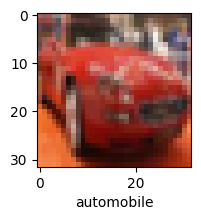

In [16]:
plot_sample(X_train, y_train, 5)

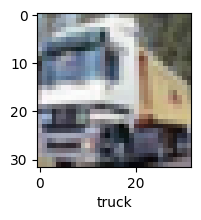

In [17]:
plot_sample(X_train, y_train, 1)

In [18]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [20]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32, 32, 3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])
ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 148s 92ms/step - loss: 1.8150 - accuracy: 0.3524
Epoch 2/5
1563/1563 [==============================] - 143s 92ms/step - loss: 1.6248 - accuracy: 0.4257
Epoch 3/5
1563/1563 [==============================] - 131s 84ms/step - loss: 1.5399 - accuracy: 0.4565
Epoch 4/5
1563/1563 [==============================] - 129s 82ms/step - loss: 1.4812 - accuracy: 0.4779
Epoch 5/5
1563/1563 [==============================] - 129s 83ms/step - loss: 1.4312 - accuracy: 0.4975


In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('classification report: \n', classification_report(y_test, y_pred_classes))

313/313 [==============================] - 12s 37ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.68      0.36      0.47      1000
           1       0.52      0.73      0.61      1000
           2       0.41      0.22      0.29      1000
           3       0.35      0.34      0.34      1000
           4       0.33      0.61      0.43      1000
           5       0.60      0.14      0.22      1000
           6       0.43      0.66      0.52      1000
           7       0.68      0.39      0.49      1000
           8       0.52      0.70      0.60      1000
           9       0.53      0.53      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.45     10000
weighted avg       0.50      0.47      0.45     10000



In [22]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

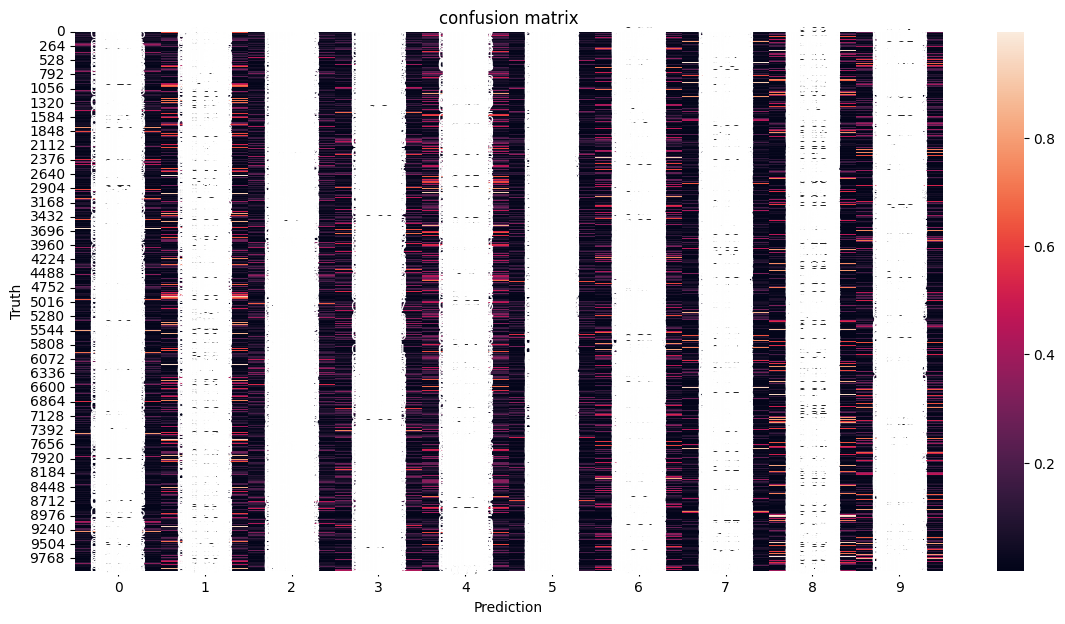

In [23]:
plt.figure(figsize = (14, 7))
sns.heatmap(y_pred, annot=True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('confusion matrix')
plt.show

In [29]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [30]:
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [31]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 61s 36ms/step - loss: 1.5168 - accuracy: 0.4570
Epoch 2/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1743 - accuracy: 0.5891
Epoch 3/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.0443 - accuracy: 0.6362
Epoch 4/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9685 - accuracy: 0.6631
Epoch 5/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9103 - accuracy: 0.6842
Epoch 6/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.8717 - accuracy: 0.6987
Epoch 7/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8295 - accuracy: 0.7120
Epoch 8/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7978 - accuracy: 0.7221
Epoch 9/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7619 - accuracy: 0.7351
Epoch 10/10
1563/1563 [==============================] - 73s 47m

In [32]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9332 - accuracy: 0.6848


[0.9331848621368408, 0.6848000288009644]

In [33]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 4s 11ms/step


In [34]:
y_pred[:5]

array([[3.46075953e-03, 1.04610472e-05, 1.38315430e-03, 6.89867854e-01,
        1.03626784e-03, 2.95702428e-01, 8.00121762e-03, 5.85127873e-06,
        4.73453518e-04, 5.86594288e-05],
       [2.04248011e-01, 2.08949074e-02, 1.15690804e-04, 1.63347358e-05,
        1.09628063e-05, 7.31328896e-07, 4.84781185e-06, 5.26544000e-07,
        7.66481757e-01, 8.22619162e-03],
       [1.85631648e-01, 1.63653672e-01, 1.60918906e-02, 1.65372882e-02,
        2.91038910e-03, 4.42091463e-04, 5.66114811e-03, 1.43984612e-03,
        5.43264270e-01, 6.43676817e-02],
       [5.99412978e-01, 1.44919325e-02, 6.89448463e-03, 2.37175194e-03,
        8.86702817e-03, 3.70068330e-04, 3.21875745e-03, 1.48457754e-03,
        3.57833862e-01, 5.05454279e-03],
       [4.15964041e-06, 1.86448651e-05, 2.02438142e-02, 5.85412309e-02,
        1.37181848e-01, 3.66495992e-03, 7.80302823e-01, 2.01457005e-05,
        1.64053672e-05, 5.88011926e-06]], dtype=float32)

In [35]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [36]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

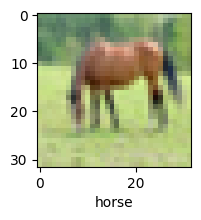

In [37]:
plot_sample(X_test, y_test, 60)

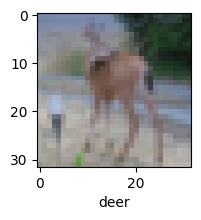

In [38]:
plot_sample(X_test, y_test, 100)

In [39]:
classes[y_classes[4]]

'frog'

In [40]:
classes[y_classes[60]]

'horse'